Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-203.719,-213.35,2.61436e-58
2,140.151,4.0,-201.258,-210.876,3.10483e-57
3,140.302,4.0,-198.827,-208.43,3.58383e-56
4,140.452,4.0,-196.423,-206.012,4.02064e-55
5,140.603,4.0,-194.048,-203.623,4.3841e-54
6,140.754,4.0,-191.702,-201.262,4.64626e-53
7,140.905,4.0,-189.383,-198.93,4.7859e-52
8,141.055,4.0,-187.094,-196.627,4.7914e-51
9,141.206,4.0,-184.832,-194.351,4.66228e-50


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,150.553,12.2814,-74.2691,-83.0375,0.102693
2,150.251,8.90452,-73.215,-82.0042,0.288615
3,156.583,8.58291,-73.8189,-82.2189,0.232836
4,151.307,10.191,-72.8091,-81.5265,0.465335
5,150.251,11.0754,-73.6516,-82.4408,0.186509
6,151.759,8.26131,-72.5728,-81.2603,0.607286
7,155.528,11.2362,-73.534,-81.9919,0.292163
8,154.02,11.8794,-73.5828,-82.1283,0.25493
9,153.568,8.50251,-72.2452,-80.8181,0.94498


### Snippet 4.23

Density of sigma

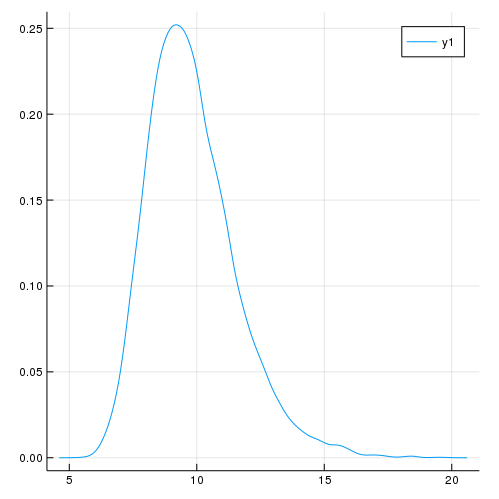

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*